1. Ознакомьтесь с данными , приведенными в таблице 1.1, их графическим изображением на диаграмме 1 и выводом, сделанным на основе графического анализа.
2. Самостоятельно сформируйте новые ряды исходных данных (показатели x, y, z) и занесите их в таблицу 1.2. Показатель x будем считать результирующим, а показатели y и z - факторными (причинными). По мере занесения данных в таблицу 2, на диаграмме 2 будет появляться их графическое изображение. Сделайте вывод на основе графического анализа по образцу.
3. Рассчитайте (пользуясь таблицей 2.1. на листе 2) линейные коэффициенты корреляции между показателями x и y, а также между показателями x и z. Сделайте выводы о том, какая связь более сильная. Тот показатель (y или z), у которого связь с показателем x более сильная, выберите для дальнейших расчетов.
4. Сделайте прогноз показателя x по двум вариантам уравнений тренда (линейному и квадратичному). Для расчета параметров уравнений тренда пользуйтесь вспомогательной таблицей на листе 3. Рассчитайте ошибки аппроксимации и сделайте вывод о том, какой прогноз более достоверен.
5. Рассчитайте параметры уравнения парной линейной  регрессии, выражающей зависимость между показателем x и тем из двух показателей (y или z), с которым связь показателя x более сильная. Пользуйтесь вспомогательными таблицами на листах 4 и 5. Рассчитайте ошибку аппроксимации и индекс детерминации. Сделайте вывод о том, насколько хорошо построенное уравнение отражает существующую зависимость.
6. Выполните (на листе 6) прогноз показателя, выбранного в п.3, по любому из уравнений тренда. Затем подставьте полученное прогнозное значение в уравнение регрессии между этим показателем и показателем x и рассчитайте прогноз спроса по уравнению регрессии.

In [361]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [362]:
df = pd.read_csv("../data/chapter_1.csv", delimiter=";")
df.head(5)

,period,x_demand,y_produced,z_price
0,2013,35,31,3.0
1,2014,39,34,3.5
2,2015,40,35,4.7
3,2016,47,37,5.4
4,2017,49,37,7.8


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   period      10 non-null     int64  
 1   x_demand    10 non-null     int64  
 2   y_produced  10 non-null     int64  
 3   z_price     10 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 448.0 bytes


In [364]:
df.describe()

,period,x_demand,y_produced,z_price
count,10.00000,10.000000,10.000000,10.000000
mean,2017.50000,47.800000,33.500000,18.130000
std,3.02765,7.405704,4.275252,18.956386
min,2013.00000,35.000000,26.000000,3.000000
25%,2015.25000,41.750000,31.750000,4.875000
50%,2017.50000,49.500000,34.500000,9.650000
75%,2019.75000,53.750000,36.500000,25.000000
max,2022.00000,56.000000,39.000000,57.800000


Task 3

<Axes: title={'center': 'Linear correlation'}>

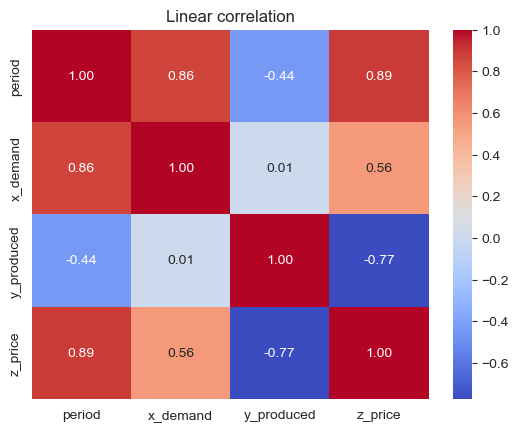

In [365]:
plt.title("Linear correlation")
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [366]:
x_demand_y_produced = px.scatter(
    df,
    x=df.x_demand,
    y=df.y_produced,
    trendline="lowess",
    trendline_options=dict(frac=0.1),
)
x_demand_y_produced.show()
x_demand_z_price = px.scatter(
    df,
    x=df.x_demand,
    y=df.z_price,
    trendline="lowess",
    trendline_options=dict(frac=0.1),
)
x_demand_z_price.show()

Task 4

Linear trend for x_demand

In [367]:
df["period"] = pd.to_datetime(df.period, format="%Y")
df.head()

,period,x_demand,y_produced,z_price
0,2013-01-01,35,31,3.0
1,2014-01-01,39,34,3.5
2,2015-01-01,40,35,4.7
3,2016-01-01,47,37,5.4
4,2017-01-01,49,37,7.8


In [368]:
df.set_index("period", inplace=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df.head()

,x_demand,y_produced,z_price
2013-01-01,35,31,3.0
2014-01-01,39,34,3.5
2015-01-01,40,35,4.7
2016-01-01,47,37,5.4
2017-01-01,49,37,7.8


<Axes: >

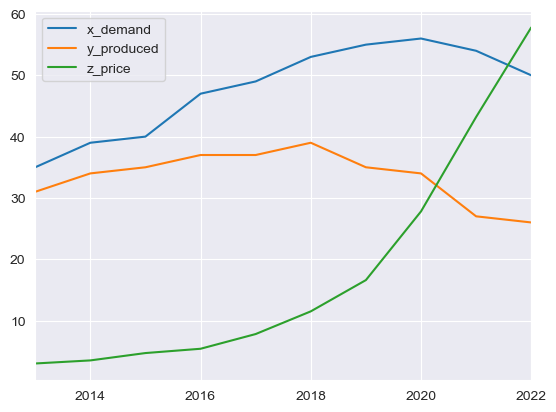

In [369]:
df.plot()

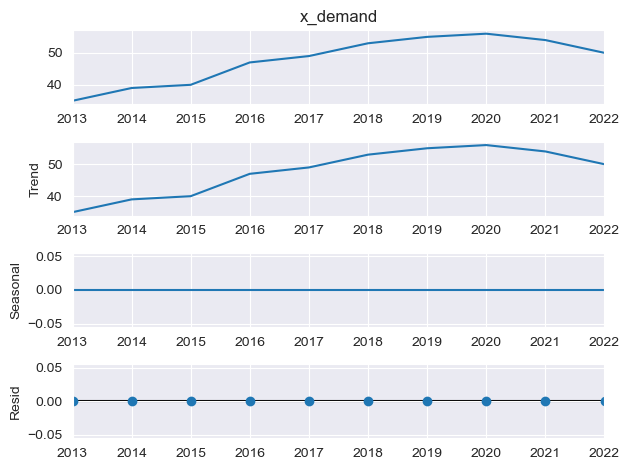

In [370]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.x_demand, model="additive")
fig = decomposition.plot()
plt.show()

In [371]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# p : Порядок авторегрессии тренда.
# d : Порядок разности тенденций.
# q : порядок трендовой скользящей средней.

# P : Сезонный авторегрессионный порядок.
# D : Порядок сезонной разницы.
# Q : Порядок сезонной скользящей средней.
# m : Количество временных шагов для одного сезонного периода.

ARMA_model = SARIMAX(df.x_demand, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
ARMA_model_fit = ARMA_model.fit()

C:\Users\R\anaconda3\envs\machine_learning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

C:\Users\R\anaconda3\envs\machine_learning\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



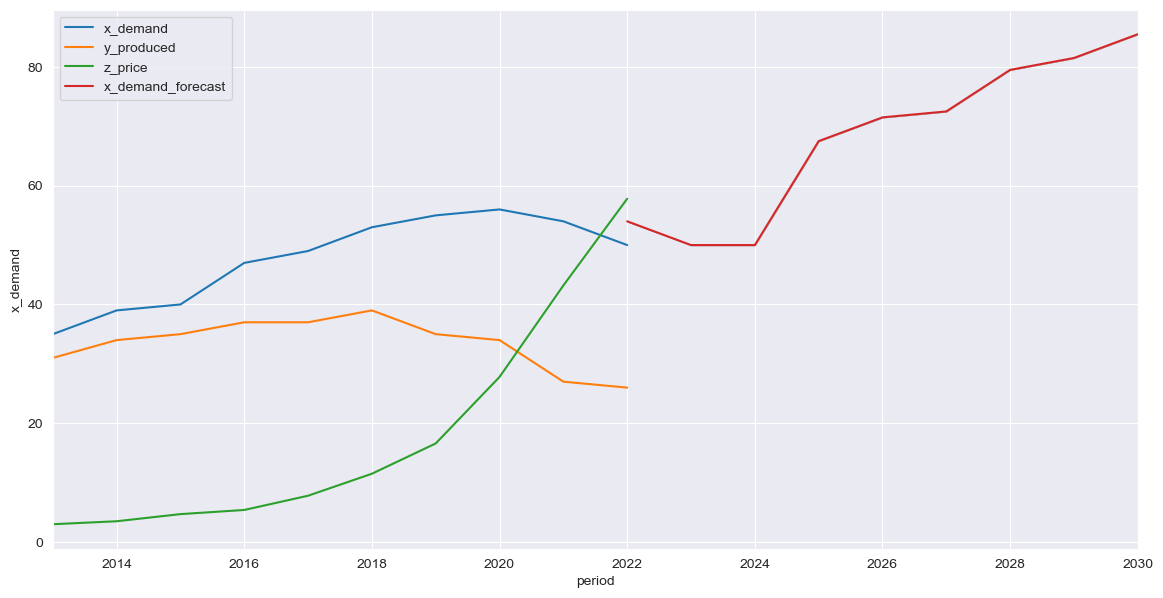

In [372]:
from statsmodels.tsa.statespace.mlemodel import PredictionResults

pred: PredictionResults = ARMA_model_fit.get_prediction(
    start=pd.to_datetime("2022-01"), end=pd.to_datetime("2030-01"), dynamic=False
)
pred_ci = pred.conf_int(alpha=1)
ax = df.plot(label="observed")
pred.predicted_mean.plot(ax=ax, label="x_demand_forecast", figsize=(14, 7))
ax.fill_between(
    pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color="k", alpha=0.2
)
ax.set_xlabel("period")
ax.set_ylabel("x_demand")
plt.legend()
plt.show()

Quadratic trend for x_demand